In [2]:
#from __future__ import division, print_function
import sys
import os
#import json
import csv
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
#import seaborn
#from scipy.optimize import curve_fit, minimize
#import pyproj
#from pyproj import Proj, transform

import geopandas as gp
from fiona.crs import from_epsg
#import subprocess
import shapely as shp
from datetime import datetime
#from itertools import compress
from geopandas.tools import sjoin
from shapely.geometry import Point


Populating the interactive namespace from numpy and matplotlib


In [3]:
new_cb_stations = gp.GeoDataFrame.from_file('data_raw_cb/new_cb_stations.shp')
#new_cb_stations.crs = {'init': 'epsg:2263', 'no_defs': True}
#new_cb_stations = new_cb_stations.to_crs(epsg=2263)
new_cb_stations.crs

{'init': u'epsg:4326'}

In [4]:
# buffers

b_1 = 50
b_2 = 100
b_3 = 150 ###
b_4 = 200
b_5 = 250 
b_6 = 300 ###
b_7 = 350
b_8 = 400
b_9 = 450 ###
b_10 = 500

buf_radius = range(50,501,50)

buf_1 = 'buf_150'
buf_2 = 'buf_300'
buf_3 = 'buf_450'
#buf_4 = 'buf_600'

# bounds

bounds =  470 # 20ft more to be safe

min_lon = 'min_lon'
min_lat = 'min_lat'
max_lon = 'max_lon'
max_lat = 'max_lat'

In [5]:
new_cb_stations[min_lon] = new_cb_stations.to_crs(epsg=2263).geometry.buffer(bounds).to_crs(epsg=4326).bounds.iloc[:,0:1]
new_cb_stations[min_lat] = new_cb_stations.to_crs(epsg=2263).geometry.buffer(bounds).to_crs(epsg=4326).bounds.iloc[:,1:2]
new_cb_stations[max_lon] = new_cb_stations.to_crs(epsg=2263).geometry.buffer(bounds).to_crs(epsg=4326).bounds.iloc[:,2:3]
new_cb_stations[max_lat] = new_cb_stations.to_crs(epsg=2263).geometry.buffer(bounds).to_crs(epsg=4326).bounds.iloc[:,3:4]

In [6]:
deployment_bnds = new_cb_stations.iloc[:,0:10].drop(['geometry','lat','lon'],axis=1)
deployment_bounds = pd.DataFrame(deployment_bnds)
deployment_bounds.to_csv('data_pre_cb/deployment_bounds.csv')

In [7]:
for bf in buf_radius:
    new_cb_stations['buf_'+str(bf)] = new_cb_stations.to_crs(epsg=2263).geometry.buffer(bf)

new_cb_stations.to_csv('data_pre_cb/deployment_bufs.csv')

In [8]:
new_cb_stations_buf_50 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_1)]]
new_cb_stations_buf_50['radius'] = b_1
new_cb_stations_buf_50 = new_cb_stations_buf_50.rename(columns={'buf_'+str(b_1):'geometry'}).set_geometry('geometry')


new_cb_stations_buf_100 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_2)]]
new_cb_stations_buf_100['radius'] = b_2
new_cb_stations_buf_100 = new_cb_stations_buf_100.rename(columns={'buf_'+str(b_2):'geometry'}).set_geometry('geometry')


new_cb_stations_buf_150 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_3)]]
new_cb_stations_buf_150['radius'] = b_3
new_cb_stations_buf_150 = new_cb_stations_buf_150.rename(columns={'buf_'+str(b_3):'geometry'}).set_geometry('geometry')


new_cb_stations_buf_200 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_4)]]
new_cb_stations_buf_200['radius'] = b_4
new_cb_stations_buf_200 = new_cb_stations_buf_200.rename(columns={'buf_'+str(b_4):'geometry'}).set_geometry('geometry')


new_cb_stations_buf_250 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_5)]]
new_cb_stations_buf_250['radius'] = b_5
new_cb_stations_buf_250 = new_cb_stations_buf_250.rename(columns={'buf_'+str(b_5):'geometry'}).set_geometry('geometry')


new_cb_stations_buf_300 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_6)]]
new_cb_stations_buf_300['radius'] = b_6
new_cb_stations_buf_300 = new_cb_stations_buf_300.rename(columns={'buf_'+str(b_6):'geometry'}).set_geometry('geometry')


new_cb_stations_buf_350 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_7)]]
new_cb_stations_buf_350['radius'] = b_7
new_cb_stations_buf_350 = new_cb_stations_buf_350.rename(columns={'buf_'+str(b_7):'geometry'}).set_geometry('geometry')


new_cb_stations_buf_400 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_8)]]
new_cb_stations_buf_400['radius'] = b_8
new_cb_stations_buf_400 = new_cb_stations_buf_400.rename(columns={'buf_'+str(b_8):'geometry'}).set_geometry('geometry')


new_cb_stations_buf_450 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_9)]]
new_cb_stations_buf_450['radius'] = b_9
new_cb_stations_buf_450 = new_cb_stations_buf_450.rename(columns={'buf_'+str(b_9):'geometry'}).set_geometry('geometry')


new_cb_stations_buf_500 = new_cb_stations[['boro_name','station_id','deployment','buf_'+str(b_10)]]
new_cb_stations_buf_500['radius'] = b_10
new_cb_stations_buf_500 = new_cb_stations_buf_500.rename(columns={'buf_'+str(b_10):'geometry'}).set_geometry('geometry')

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [8]:
new_cb_stations_buf_50.to_file('data_pre_cb/deployment_bufs_50.shp')
new_cb_stations_buf_100.to_file('data_pre_cb/deployment_bufs_100.shp')
new_cb_stations_buf_150.to_file('data_pre_cb/deployment_bufs_150.shp')
new_cb_stations_buf_200.to_file('data_pre_cb/deployment_bufs_200.shp')
new_cb_stations_buf_250.to_file('data_pre_cb/deployment_bufs_250.shp')
new_cb_stations_buf_300.to_file('data_pre_cb/deployment_bufs_300.shp')
new_cb_stations_buf_350.to_file('data_pre_cb/deployment_bufs_350.shp')
new_cb_stations_buf_400.to_file('data_pre_cb/deployment_bufs_400.shp')
new_cb_stations_buf_450.to_file('data_pre_cb/deployment_bufs_450.shp')
new_cb_stations_buf_500.to_file('data_pre_cb/deployment_bufs_500.shp')

In [9]:
bufs = gp.GeoDataFrame()

bufs = new_cb_stations_buf_50.append(new_cb_stations_buf_100, ignore_index = True)
bufs = bufs.append(new_cb_stations_buf_150, ignore_index = True)
bufs = bufs.append(new_cb_stations_buf_200, ignore_index = True)
bufs = bufs.append(new_cb_stations_buf_250, ignore_index = True)
bufs = bufs.append(new_cb_stations_buf_300, ignore_index = True)
bufs = bufs.append(new_cb_stations_buf_350, ignore_index = True)
bufs = bufs.append(new_cb_stations_buf_400, ignore_index = True)
bufs = bufs.append(new_cb_stations_buf_450, ignore_index = True)
bufs = bufs.append(new_cb_stations_buf_500, ignore_index = True)

bufs.to_file('data_pre_cb/bufs_all.shp')

In [10]:
bufs_3 = gp.GeoDataFrame()

bufs_3 = new_cb_stations_buf_150.append(new_cb_stations_buf_300, ignore_index = True)
bufs_3 = bufs_3.append(new_cb_stations_buf_450, ignore_index = True)
bufs_3.to_file('data_pre_cb/bufs_3.shp')

In [32]:
# for plotting...

boro_shapes_feet= gp.GeoDataFrame.from_file("data/boro_shapes.shp")
boro_shapes_feet.crs = {'init': 'epsg:2263', 'no_defs': True}
boro_shapes_feet = boro_shapes_feet.to_crs(epsg=2263)
boro_shapes_feet.crs

bufs['date_deployed'] = pd.to_datetime(bufs['deployment'])
bufs = bufs.sort('date_deployed')

# Blobs

bn1 = 'Brooklyn'
bn2 = 'Manhattan'
bn3 = 'Queens'

cb_450_bk_blob = new_cb_stations_buf_450[new_cb_stations_buf_450.boro_name == bn1][['boro_name','geometry']].dissolve(by='boro_name')
cb_450_mn_blob = new_cb_stations_buf_450[new_cb_stations_buf_450.boro_name == bn2][['boro_name','geometry']].dissolve(by='boro_name')
cb_450_qu_blob = new_cb_stations_buf_450[new_cb_stations_buf_450.boro_name == bn3][['boro_name','geometry']].dissolve(by='boro_name')


/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


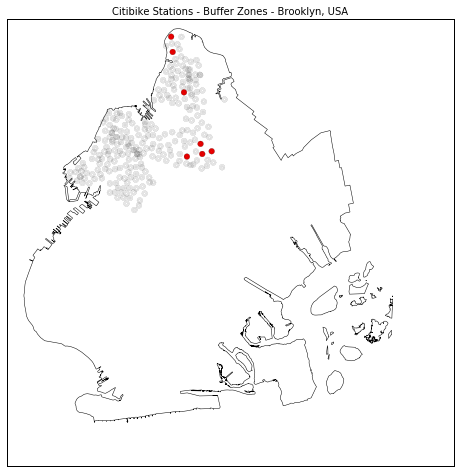

In [33]:
f, ax = plt.subplots(figsize=(8,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
boro_shapes_feet[boro_shapes_feet.boro_name == bn1].plot(column='boro_name',alpha=.1,color='white',linewidth=0.5,ax=ax)
bufs_3[bufs_3.boro_name == bn1].geometry.plot(alpha=1,color='white', linewidth=.1,ax=ax)

bufs[(bufs.station_id == 3117) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3117',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3112) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3112',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3054) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3054',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3050) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3050',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3048) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3048',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3052) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3052',alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3080) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3080',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3082) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3082',alpha=1,color='red', linewidth=.1,ax=ax)

plt.title("Citibike Stations - Buffer Zones - Brooklyn, USA", fontsize = 10)

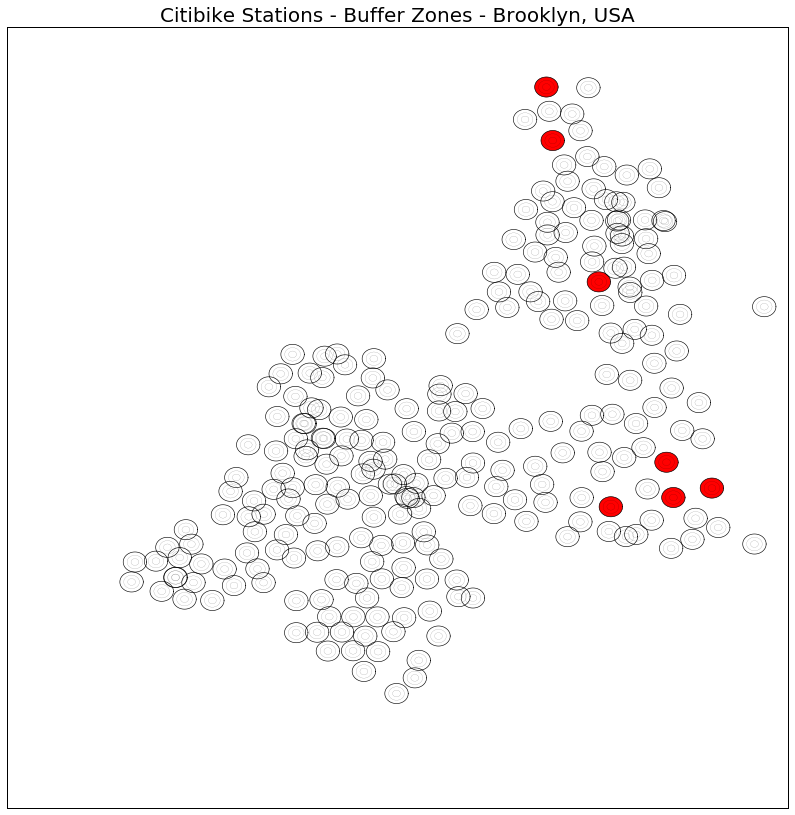

In [34]:
f, ax = plt.subplots(figsize=(14,14))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
new_cb_stations_buf_150[new_cb_stations_buf_150.boro_name == bn1].geometry.plot(alpha=1,color='white', linewidth=.1,ax=ax)
new_cb_stations_buf_300[new_cb_stations_buf_300.boro_name == bn1].geometry.plot(alpha=1,color='pink', linewidth=.1,ax=ax)
new_cb_stations_buf_450[new_cb_stations_buf_450.boro_name == bn1].geometry.plot(alpha=1,color='white', linewidth=.6,ax=ax)

bufs[(bufs.station_id == 3117) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3117',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3112) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3112',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3054) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3054',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3050) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3050',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3048) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3048',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3052) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3052',alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3080) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3080',alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3082) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(label='3082',alpha=1,color='red', linewidth=.1,ax=ax)

plt.title("Citibike Stations - Buffer Zones - Brooklyn, USA", fontsize = 20)

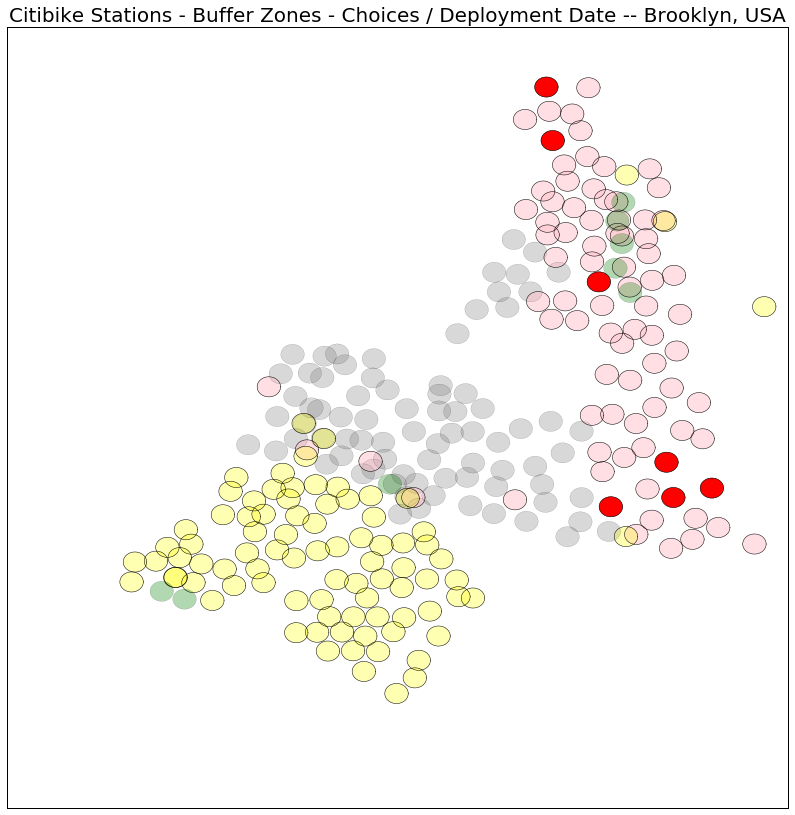

In [35]:
f, ax = plt.subplots(figsize=(14,14))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

bufs[(bufs.boro_name == bn1) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2013)].geometry.plot(alpha=.3,color='grey', linewidth=.1,ax=ax, label='deployed 2013')
bufs[(bufs.boro_name == bn1) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2014)].geometry.plot(alpha=.3,color='blue', linewidth=.5,ax=ax, label='deployed 2014')
bufs[(bufs.boro_name == bn1) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2015)].geometry.plot(alpha=.5,color='pink', linewidth=.5,ax=ax, label='deployed 2015')
bufs[(bufs.boro_name == bn1) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2016)].geometry.plot(alpha=.3,color='yellow', linewidth=.5,ax=ax, label='deployed 2016')
bufs[(bufs.boro_name == bn1) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2017)].geometry.plot(alpha=.3,color='green', linewidth=.1,ax=ax, label='deployed 2017')
    
bufs[(bufs.station_id == 3117) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3112) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3054) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3050) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3048) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3052) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3080) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3082) & (bufs.boro_name == bn1) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)

plt.title("Citibike Stations - Buffer Zones - Choices / Deployment Date -- Brooklyn, USA", fontsize = 20)
#plt.legend()

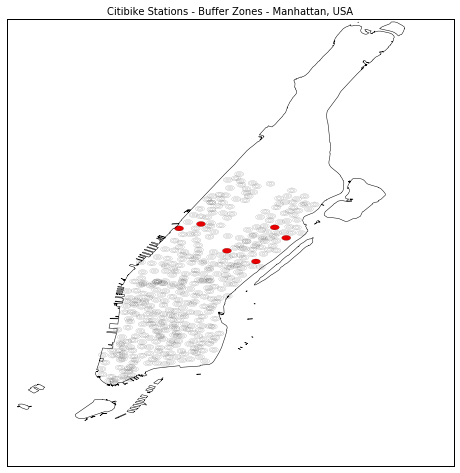

In [36]:
f, ax = plt.subplots(figsize=(8,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
boro_shapes_feet[boro_shapes_feet.boro_name == bn2].plot(column='boro_name',alpha=.1,color='white',linewidth=0.5,ax=ax)
bufs_3[bufs_3.boro_name == bn2].geometry.plot(alpha=1,color='white', linewidth=.1,ax=ax)

bufs[(bufs.station_id == 3173) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3167) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3160) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3147) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3151) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3142) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3136) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)

plt.title("Citibike Stations - Buffer Zones - Manhattan, USA", fontsize = 10)

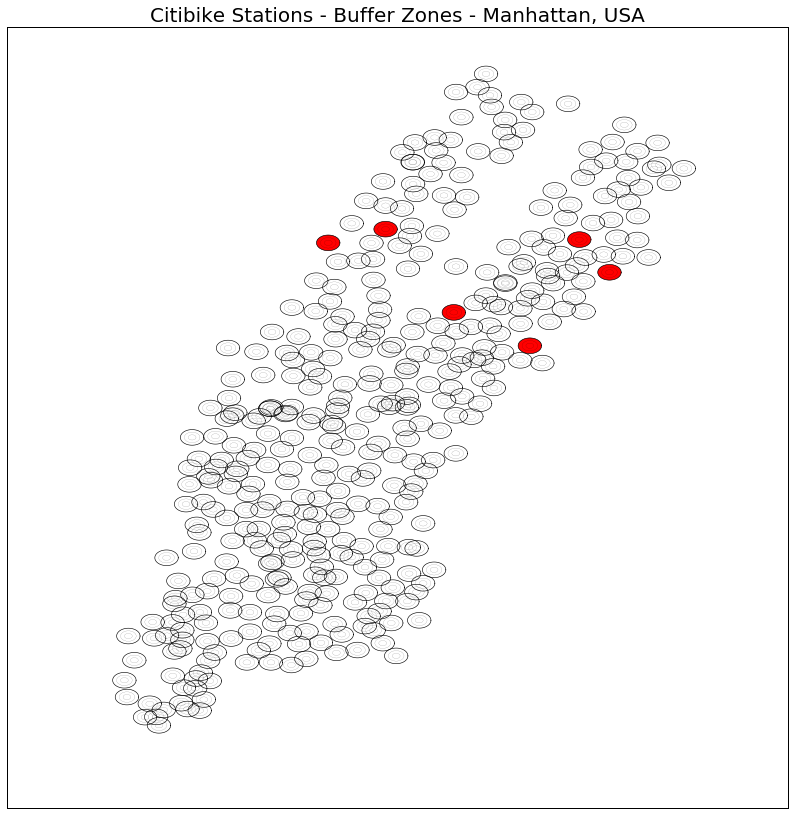

In [38]:
f, ax = plt.subplots(figsize=(14,14))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
new_cb_stations_buf_150[new_cb_stations_buf_150.boro_name == bn2].geometry.plot(alpha=1,color='white', linewidth=.1,ax=ax)
new_cb_stations_buf_300[new_cb_stations_buf_300.boro_name == bn2].geometry.plot(alpha=1,color='pink', linewidth=.1,ax=ax)
new_cb_stations_buf_450[new_cb_stations_buf_450.boro_name == bn2].geometry.plot(alpha=1,color='white', linewidth=.6,ax=ax)

bufs[(bufs.station_id == 3173) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3167) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3160) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3147) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3151) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3142) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3136) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)

plt.title("Citibike Stations - Buffer Zones - Manhattan, USA", fontsize = 20)

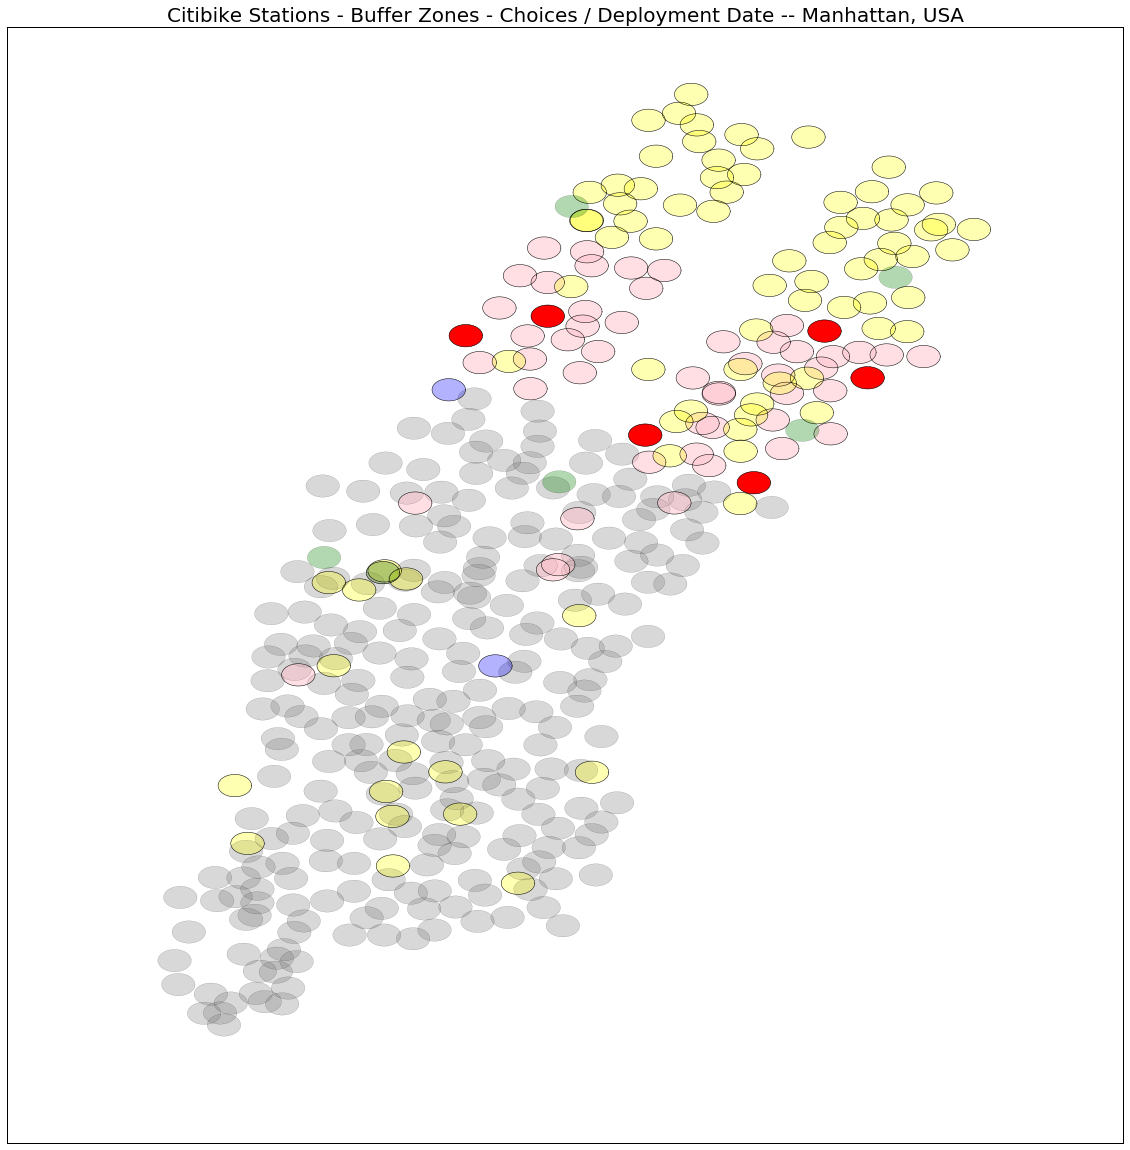

In [39]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#cb_450_bk_blob.geometry.plot(alpha=.1,color='red', linewidth=.1,ax=ax)
#cb_450_mn_blob.geometry.plot(alpha=.1,color='red', linewidth=.1,ax=ax)
#cb_450_qu_blob.geometry.plot(alpha=.1,color='red', linewidth=.1,ax=ax)

bufs[(bufs.boro_name == bn2) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2013)].geometry.plot(alpha=.3,color='grey', linewidth=.1,ax=ax)
bufs[(bufs.boro_name == bn2) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2014)].geometry.plot(alpha=.3,color='blue', linewidth=.5,ax=ax)
bufs[(bufs.boro_name == bn2) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2015)].geometry.plot(alpha=.5,color='pink', linewidth=.5,ax=ax)
bufs[(bufs.boro_name == bn2) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2016)].geometry.plot(alpha=.3,color='yellow', linewidth=.5,ax=ax)
bufs[(bufs.boro_name == bn2) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2017)].geometry.plot(alpha=.3,color='green', linewidth=.1,ax=ax)

bufs[(bufs.station_id == 3173) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3167) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3160) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3147) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3151) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3142) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3136) & (bufs.boro_name == bn2) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)

plt.title("Citibike Stations - Buffer Zones - Choices / Deployment Date -- Manhattan, USA", fontsize = 20)
#plt.legend()

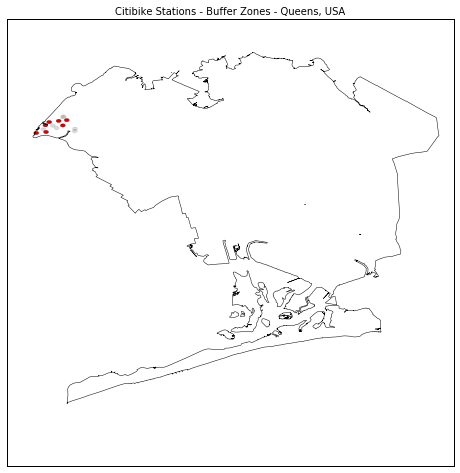

In [41]:
bn1 = 'Brooklyn'
bn2 = 'Manhattan'
bn3 = 'Queens'

f, ax = plt.subplots(figsize=(8,8))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
boro_shapes_feet[boro_shapes_feet.boro_name == bn3].plot(column='boro_name',alpha=.1,color='white',linewidth=0.5,ax=ax)
bufs_3[bufs_3.boro_name == bn3].geometry.plot(alpha=1,color='white', linewidth=.1,ax=ax)

bufs[(bufs.station_id == 3127) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3128) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3129) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3130) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3120) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3237) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3125) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3124) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3126) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3123) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3119) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)


plt.title("Citibike Stations - Buffer Zones - Queens, USA", fontsize = 10)


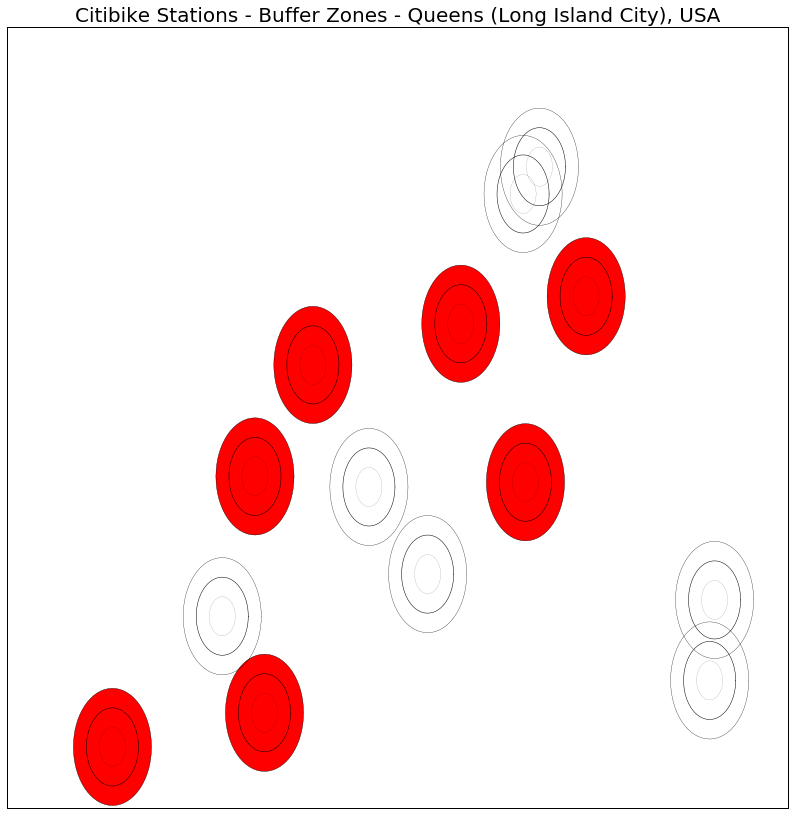

In [42]:

f, ax = plt.subplots(figsize=(14,14))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
new_cb_stations_buf_150[new_cb_stations_buf_150.boro_name == bn3].geometry.plot(alpha=1,color='white', linewidth=.1,ax=ax)
new_cb_stations_buf_300[new_cb_stations_buf_300.boro_name == bn3].geometry.plot(alpha=1,color='white', linewidth=.5,ax=ax)
new_cb_stations_buf_450[new_cb_stations_buf_450.boro_name == bn3].geometry.plot(alpha=1,color='white', linewidth=.3,ax=ax)

bufs[(bufs.station_id == 3127) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3128) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3129) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3130) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3120) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3237) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3125) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3124) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3126) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3123) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3119) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)



plt.title("Citibike Stations - Buffer Zones - Queens (Long Island City), USA", fontsize = 20)

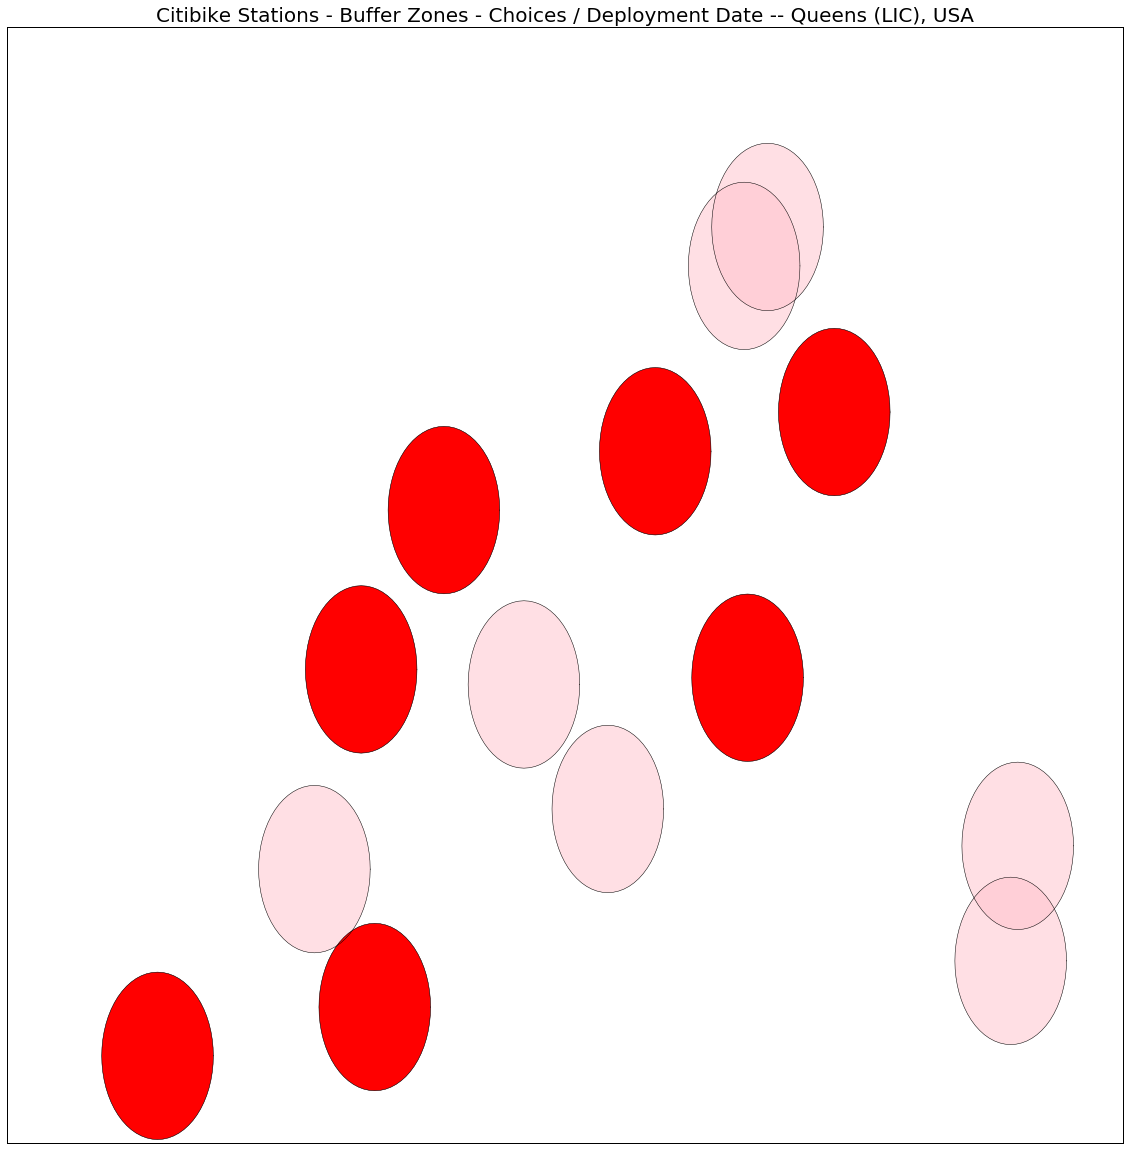

In [43]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#cb_450_bk_blob.geometry.plot(alpha=.1,color='red', linewidth=.1,ax=ax)
#cb_450_mn_blob.geometry.plot(alpha=.1,color='red', linewidth=.1,ax=ax)
#cb_450_qu_blob.geometry.plot(alpha=.1,color='red', linewidth=.1,ax=ax)

bufs[(bufs.boro_name == bn3) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2013)].geometry.plot(alpha=.3,color='grey', linewidth=.1,ax=ax)
bufs[(bufs.boro_name == bn3) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2014)].geometry.plot(alpha=.3,color='blue', linewidth=.5,ax=ax)
bufs[(bufs.boro_name == bn3) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2015)].geometry.plot(alpha=.5,color='pink', linewidth=.5,ax=ax)
bufs[(bufs.boro_name == bn3) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2016)].geometry.plot(alpha=.3,color='yellow', linewidth=.5,ax=ax)
bufs[(bufs.boro_name == bn3) & (bufs.radius ==450) & (bufs.date_deployed.dt.year == 2017)].geometry.plot(alpha=.3,color='green', linewidth=.1,ax=ax)

bufs[(bufs.station_id == 3127) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3128) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3129) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3130) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3120) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3237) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3125) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3124) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3126) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
#bufs[(bufs.station_id == 3123) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)
bufs[(bufs.station_id == 3119) & (bufs.boro_name == bn3) & (bufs.radius ==450)].geometry.plot(alpha=1,color='red', linewidth=.1,ax=ax)


plt.title("Citibike Stations - Buffer Zones - Choices / Deployment Date -- Queens (LIC), USA", fontsize = 20)
#plt.legend()

In [ ]:
#MN
#3147 - Y_PU, Y_DO, G_DO
#3151 - Y_PU, Y_DO, G_DO
#3142 - Y_PU, Y_DO, G_DO
#3167 - Y_PU, Y_DO, G_DO
#3173 - Y_PU, Y_DO, G_DO
#3136 - Y_PU, Y_DO, G_DO

#BK
#3052 - ALL
#3054 - ALL
#3112 - ALL
#3082 - ALL
#3117 - ALL

#QN
#3126 - ALL
#3127 - ALL
#3128 - ALL
#3119 - ALL





#3125 - Y_PU, G_PU

#3080 - G_PU, G_DO, ??
#3050 - 
#3048 - Y_PU

#3120 - 
#3124 - Y_PU, Y_DO
#3142
